In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris, make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

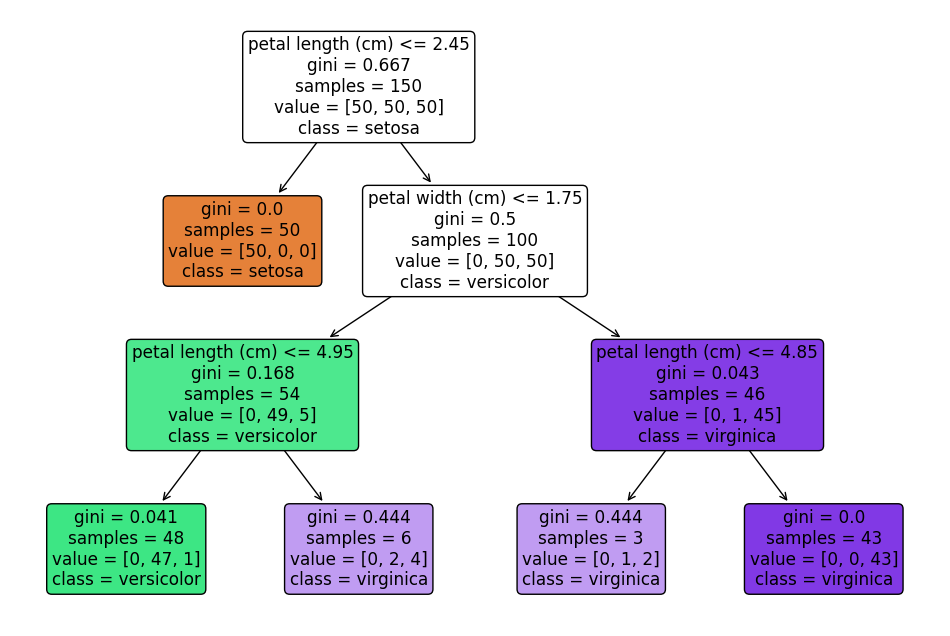

In [3]:
# 1. Decision Tree Structure

""""
Purpose: Visualize the structure of a trained decision tree.
Why use it: Helps interpret how the model splits features.
When to use: After training a decision tree.
X-axis: Tree depth.
Y-axis: Nodes (splits).
Intuition: Follow branches to understand decision rules.
"""
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=list(iris.target_names),
          filled=True, rounded=True)
plt.show()

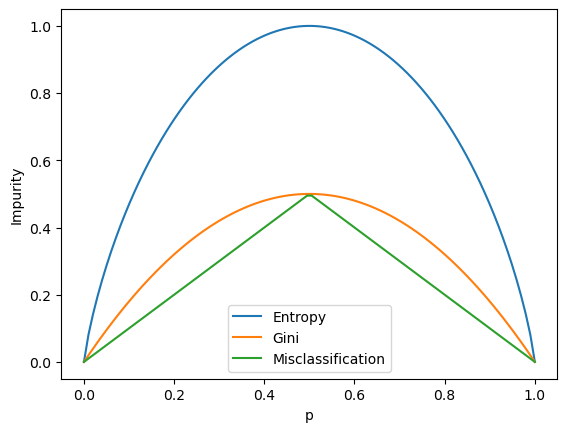

In [4]:
# 2. Impurity Measures Comparison


"""
Purpose: Compare entropy, Gini, and misclassification error.
Why use it: To understand different impurity metrics.
When to use: While teaching or analyzing decision criteria.
X-axis: Class probability p.
Y-axis: Impurity value.
Intuition: Shows how splits are evaluated differently.
"""
p = np.linspace(0, 1, 100)
entropy = -(p*np.log2(p+1e-9) + (1-p)*np.log2(1-p+1e-9))
gini = 2*p*(1-p)
misclass = 1 - np.maximum(p, 1-p)

plt.plot(p, entropy, label="Entropy")
plt.plot(p, gini, label="Gini")
plt.plot(p, misclass, label="Misclassification")
plt.xlabel("p")
plt.ylabel("Impurity")
plt.legend()
plt.show()

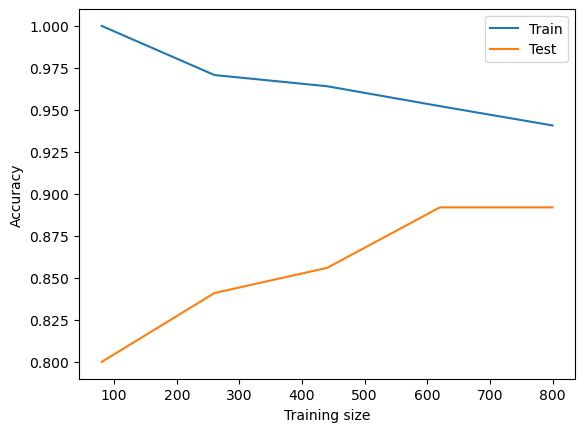

In [5]:
# 3. Learning Curve


"""
Purpose: Show model performance with increasing training size.
Why use it: Detect overfitting or underfitting.
When to use: To decide if more data is needed.
X-axis: Training set size.
Y-axis: Accuracy.
Intuition: Large gap = high variance; both low = high bias.
"""
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
clf = DecisionTreeClassifier(max_depth=5)
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test")
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


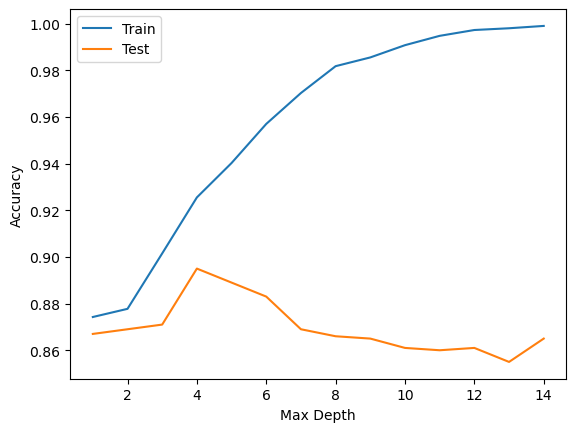

In [6]:
# 4. Validation Curve

"""
Purpose: Analyze performance across different hyperparameters.
Why use it: Choose optimal tree depth.
When to use: During model tuning.
X-axis: Max depth.
Y-axis: Accuracy.
Intuition: Peak point = best tradeoff.
"""
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
param_range = range(1, 15)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y,
                                             param_name="max_depth",
                                             param_range=param_range, cv=5)
plt.plot(param_range, np.mean(train_scores, axis=1), label="Train")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

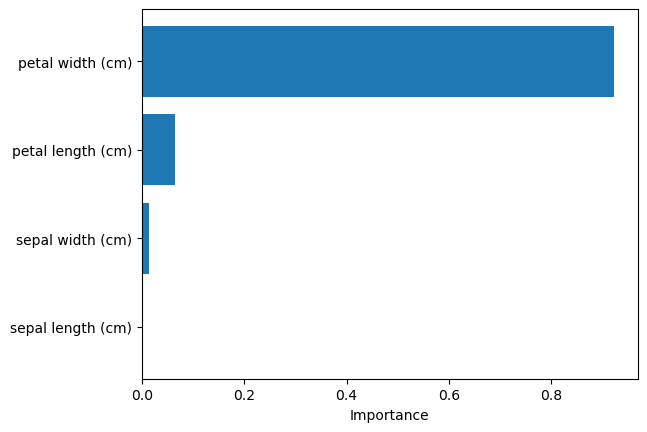

In [7]:
# 5. Feature Importance

"""
Purpose: Rank features by importance.
Why use it: Identify influential variables.
When to use: After model training.
X-axis: Feature names.
Y-axis: Importance score.
Intuition: Higher score = more used in splits.
"""
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier().fit(X, y)
plt.barh(iris.feature_names, clf.feature_importances_)
plt.xlabel("Importance")
plt.show()

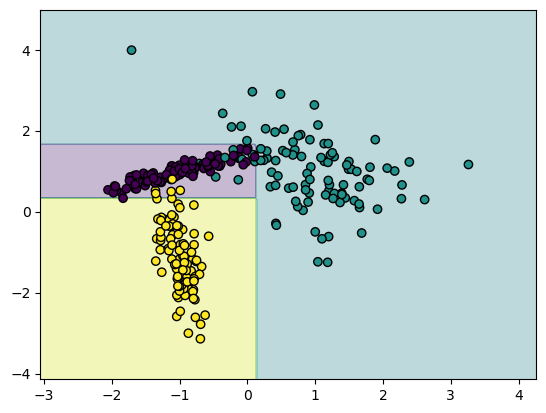

In [8]:
# 6. Decision Boundaries

"""
Purpose: Visualize how decision tree splits feature space.
Why use it: To understand axis-aligned splits.
When to use: For 2D toy datasets.
X-axis, Y-axis: Two features.
Intuition: Sharp rectangular boundaries reflect tree splits.
"""
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_classes=3,
                           n_clusters_per_class=1, random_state=42)
clf = DecisionTreeClassifier(max_depth=4).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

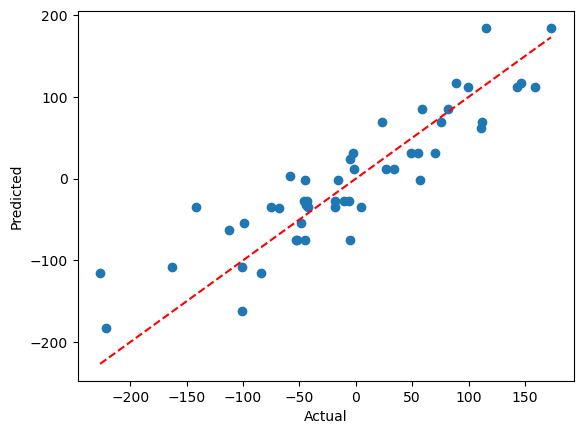

In [9]:
# 7. Regression Tree: Actual vs Predicted

"""
Purpose: Compare predicted and actual values.
Why use it: Evaluate regression tree performance.
When to use: Regression tasks.
X-axis: Actual values.
Y-axis: Predicted values.
Intuition: Points close to diagonal = good predictions.
"""
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
preds = reg.predict(X_test)

plt.scatter(y_test, preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

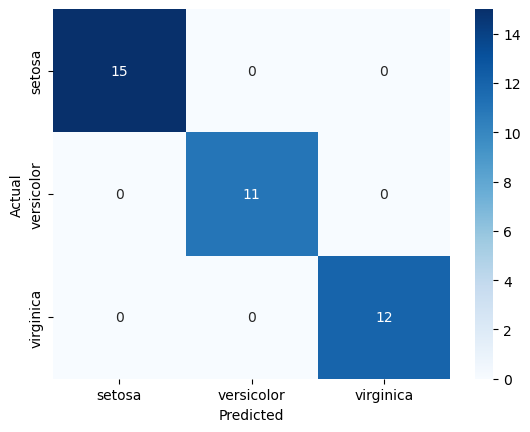

In [10]:
# 8. Confusion Matrix

"""
Purpose: Show classification errors.
Why use it: Identify specific misclassifications.
When to use: After classification.
X-axis: Predicted labels.
Y-axis: True labels.
Intuition: Perfect model = diagonal only.
"""
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
preds = clf.predict(X_test)
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

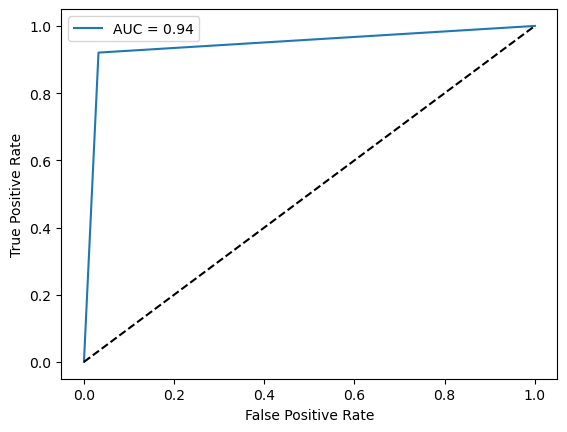

In [11]:
# 9. ROC Curve & AUC

"""
Purpose: Evaluate classifier threshold-independent.
Why use it: Robust performance measure.
When to use: Binary classification.
X-axis: False Positive Rate.
Y-axis: True Positive Rate.
Intuition: Higher AUC = better classifier.
"""
X, y = make_classification(n_samples=500, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

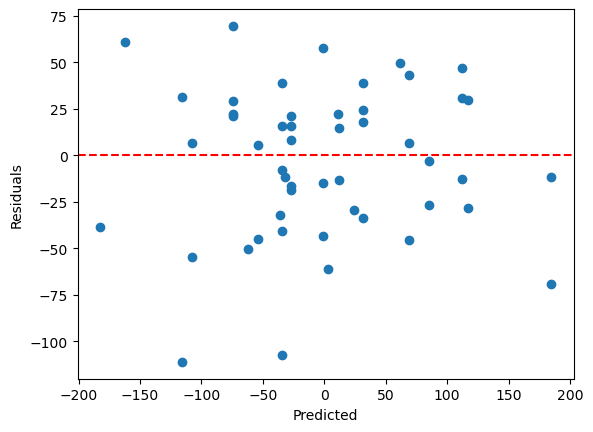

In [12]:
# 10. Residual Plot (Regression)

"""
Purpose: Show errors between actual and predicted values.
Why use it: Detect bias/variance issues.
When to use: Regression tasks.
X-axis: Predicted values.
Y-axis: Residuals (errors).
Intuition: Random scatter around 0 = good model.
"""
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
preds = reg.predict(X_test)
residuals = y_test - preds

plt.scatter(preds, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()